In [2]:
%matplotlib inline

1.04980286753


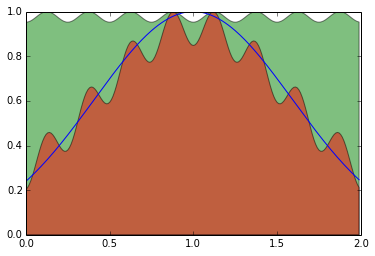

In [3]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.0, 2, 0.01)
base = np.sin(4*np.pi*x)**2
y1 = (1 + 0.05*base)
y1Max = np.max(y1)
print y1Max
y1/=y1Max
y2 = (0.2*base+np.exp(-((x-1)**2)/.7))
y2Max = np.max(y2)
y2/=y2Max

#fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

plt.fill_between(x, 0, y1,facecolor='green', alpha=0.5, interpolate=True)
plt.fill_between(x, 0, y2,facecolor='red', alpha=0.5, interpolate=True)
spr = np.exp(-((x-1)**2)/.7)
plt.plot(x,spr)

#ax1.set_ylabel('between y1 and 0')

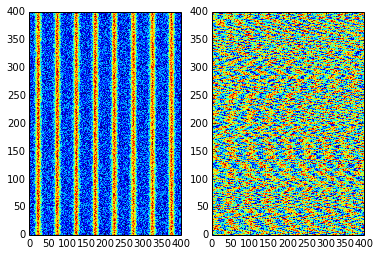

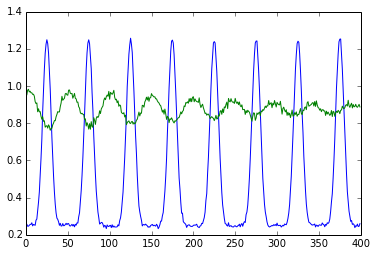

In [50]:
#a = np.mgrid[:3, :3][0]
x = np.arange(0.0, 2, 0.005)
dim = np.shape(x)[0]
base = np.sin(4*np.pi*x)**10

perturb = np.zeros([dim,dim])
for i in np.arange(dim):
  p =4*(np.random.rand(1)-0.5)
  f = 4 + 0.5*(np.random.rand(1)-0.5)
  perturb[i,:] =  np.sin(f*np.pi*x-p)**2
chf = perturb
chf-=np.min(chf)
chf/=np.max(chf)

wt = np.outer(np.ones( dim ),base)
wt-=np.min(wt)
wt/=np.max(wt)

wt += 0.5*np.reshape( np.random.rand(dim*dim), (dim,dim))
chf += 0.75*np.reshape( np.random.rand(dim*dim), (dim,dim))
plt.figure()
plt.subplot(1,2,1)
plt.pcolormesh(wt)

plt.subplot(1,2,2)
plt.pcolormesh(chf)

plt.figure()
wtProj =  np.mean(wt,axis=0)
ptProj =  np.mean(chf,axis=0)

plt.plot(wtProj)
plt.plot(ptProj)


(200, 250)

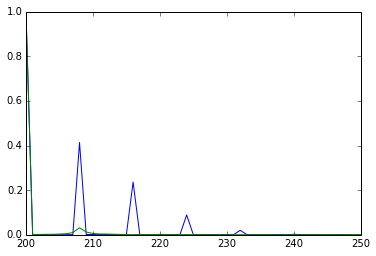

In [53]:
WT = np.abs(np.fft.fftn(wtProj))
WT = np.fft.fftshift(WT)
PT = np.abs(np.fft.fftn(ptProj))
PT = np.fft.fftshift(PT)

#A = np.fft.fftshift(A)
plt.plot(WT/np.max(WT))
plt.plot(PT/np.max(PT))
plt.xlim([200,250])

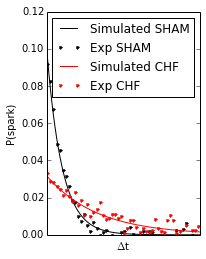

In [90]:
plt.subplot(1,2,1)
dts = np.linspace(0,3,100)
pSparkWT = np.exp(-dts/0.3)
pSparkWT/=np.sum(pSparkWT)
pSparkWTExp = pSparkWT[::2] + 0.003*np.random.randn(50)

pSparkCHF = np.exp(-dts/1.)
pSparkCHF/=np.sum(pSparkCHF)
pSparkCHFExp = pSparkCHF[::2] + 0.003*np.random.randn(50)

plt.plot(dts,pSparkWT,'k',label="Simulated SHAM")
plt.plot(dts[::2],pSparkWTExp,'k.',label="Exp SHAM")
plt.plot(dts,pSparkCHF,'r', label="Simulated CHF")
plt.plot(dts[::2],pSparkCHFExp,'r.',label="Exp CHF")
plt.legend()
plt.ylim([0,0.12])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

plt.ylabel("P(spark)") 
plt.xlabel("$\Delta$t")

In [91]:
pwd

u'/Users/huskeypm/Dropbox/Documents/Work/notes/teaching/CHE446G/textbook'